<a href="https://colab.research.google.com/github/LRisaro/TP_DATOS_2021/blob/main/TP_DATOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [718]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
from matplotlib import pyplot as plt
import seaborn as sbn
from sklearn import tree
from sklearn.metrics import accuracy_score

%matplotlib inline

plt.style.use('default') 

sbn.set(style="whitegrid") 

In [719]:
def GetData():
  return pd.read_csv("https://docs.google.com/spreadsheets/d/1-DWTP8uwVS-dZY402-dm0F9ICw_6PNqDGLmH0u8Eqa0/export?format=csv&gid=2054774482")

# **Inspección inicial del dataset**

In [720]:
# Obtengo el set de datos en un dataframe
df = GetData()
df

,anios_estudiados,barrio,categoria_de_trabajo,edad,educacion_alcanzada,estado_marital,ganancia_perdida_declarada_bolsa_argentina,genero,horas_trabajo_registradas,religion,rol_familiar_registrado,tiene_alto_valor_adquisitivo,trabajo
0,17,Palermo,empleado_provincial,39,universidad_3_anio,sin_matrimonio,2174,hombre,40,cristianismo,sin_familia,0,entretenimiento
1,17,Palermo,monotibutista,50,universidad_3_anio,matrimonio_civil,0,hombre,13,cristianismo,casado,0,directivo_gerente
2,13,Palermo,relacion_de_dependencia,38,4_anio,divorciado,0,hombre,40,cristianismo,sin_familia,0,limpiador
3,11,Palermo,relacion_de_dependencia,53,2_anio,matrimonio_civil,0,hombre,40,judaismo,casado,0,limpiador
4,17,Balvanera,relacion_de_dependencia,28,universidad_3_anio,matrimonio_civil,0,mujer,40,judaismo,casada,0,profesional_especializado
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,16,Palermo,relacion_de_dependencia,27,universidad_2_anio,matrimonio_civil,0,mujer,38,cristianismo,casada,0,soporte_tecnico
32557,13,Palermo,relacion_de_dependencia,40,4_anio,matrimonio_civil,0,hombre,40,cristianismo,casado,1,inspector
32558,13,Palermo,relacion_de_dependencia,58,4_anio,viudo_a,0,mujer,40,cristianismo,soltero_a,0,entretenimiento
32559,13,Palermo,relacion_de_dependencia,22,4_anio,sin_matrimonio,0,hombre,20,cristianismo,con_hijos,0,entretenimiento


In [721]:
# Inspeccionamos las dimensiones iniciales del dataframe
df.shape

(32561, 13)

In [722]:
# Verifico que "tiene_alto_valor_adquisitivo" no tenga valores nulos
df['tiene_alto_valor_adquisitivo'].isnull().sum()

0

In [723]:
# Verificamos si hay campos con valores nulos
df.isnull().sum()

anios_estudiados                                 0
barrio                                         583
categoria_de_trabajo                          1836
edad                                             0
educacion_alcanzada                              0
estado_marital                                   0
ganancia_perdida_declarada_bolsa_argentina       0
genero                                           0
horas_trabajo_registradas                        0
religion                                         0
rol_familiar_registrado                          0
tiene_alto_valor_adquisitivo                     0
trabajo                                       1843
dtype: int64

# **Análisis de columnas**

## **Años estudiados**

**Preguntas:**

* ¿La columna aporta información relevante?
* ¿El dato esta completo en todas las filas?
* ¿Los datos tienen mucha varianza?
* ¿Aporta valor para realizar una predicción?

**Análisis**

In [724]:
# ¿Tiene valores nulos?
df["anios_estudiados"].isnull().sum()

0

In [725]:
df["anios_estudiados"].value_counts()

13    10501
14     7291
17     5355
18     1723
15     1382
11     1175
16     1067
10      933
8       646
19      576
9       514
12      433
20      413
6       333
4       168
1        51
Name: anios_estudiados, dtype: int64

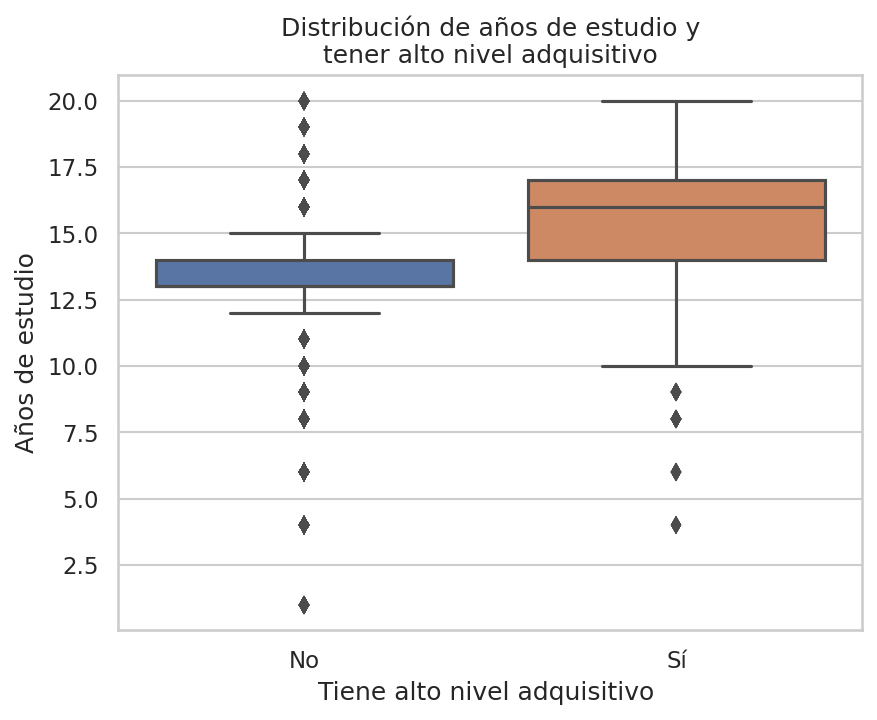

In [726]:
plt.figure(dpi=150)
plt.title("Distribución de años de estudio y\n tener alto nivel adquisitivo ")
sbn.boxplot(
    data=df,
    y='anios_estudiados',
    x='tiene_alto_valor_adquisitivo'
)
plt.ylabel("Años de estudio")
plt.xlabel("Tiene alto nivel adquisitivo ")
plt.xticks([False, True], ["No", "Sí"])
plt.show()

**Conclusiones**

Podemos observar que esta columna no tiene registros faltantes. 

Al analizar la distribución de años de estudio vemos que los que tiene entre 14 y 17 aproxidamente tienen un alto nivel adquisitivo.

## **Categoria de trabajo**

**Preguntas:**

* ¿La columna aporta información relevante?
* ¿El dato esta completo en todas las filas?
* ¿Los datos tienen mucha varianza?
* ¿Aporta valor para realizar una predicción?

**Análisis**


In [727]:
# ¿Tiene valores nulos?
df["categoria_de_trabajo"].isnull().sum()

1836

In [728]:
df["categoria_de_trabajo"].value_counts()

relacion_de_dependencia    22696
monotibutista               2541
empleado_municipal          2093
empleado_provincial         1298
responsable_inscripto       1116
empleadao_estatal            960
trabajo_voluntariado          14
sin_trabajo                    7
Name: categoria_de_trabajo, dtype: int64

In [729]:
# Eliminamos las categorias trabajo_voluntariado y sin_trabajo por tener tan solo 21 registros entre ambos
df = df.drop(df[df["categoria_de_trabajo"] == "trabajo_voluntariado"].index)
df = df.drop(df[df["categoria_de_trabajo"] == "sin_trabajo"].index)

In [730]:
df["categoria_de_trabajo"].value_counts()

relacion_de_dependencia    22696
monotibutista               2541
empleado_municipal          2093
empleado_provincial         1298
responsable_inscripto       1116
empleadao_estatal            960
Name: categoria_de_trabajo, dtype: int64

In [731]:
# Analizamos categoria relacion de dependencia
df_categoria_trabajo_dependiente = df[df["categoria_de_trabajo"] == "relacion_de_dependencia"]
df_categoria_trabajo_dependiente["tiene_alto_valor_adquisitivo"].value_counts()

0    17733
1     4963
Name: tiene_alto_valor_adquisitivo, dtype: int64

In [732]:
# Analizamos categoria monotibutista
df_categoria_trabajo_monotributista = df[df["categoria_de_trabajo"] == "monotibutista"]
df_categoria_trabajo_monotributista["tiene_alto_valor_adquisitivo"].value_counts()

0    1817
1     724
Name: tiene_alto_valor_adquisitivo, dtype: int64

In [733]:
# Analizamos categoria empleado municipal          
df_categoria_trabajo_municipal = df[df["categoria_de_trabajo"] == "empleado_municipal"]
df_categoria_trabajo_municipal["tiene_alto_valor_adquisitivo"].value_counts()

0    1476
1     617
Name: tiene_alto_valor_adquisitivo, dtype: int64

In [734]:
# Analizamos categoria empleado provincial
df_categoria_trabajo_provincial = df[df["categoria_de_trabajo"] == "empleado_provincial"]
df_categoria_trabajo_provincial["tiene_alto_valor_adquisitivo"].value_counts()

0    945
1    353
Name: tiene_alto_valor_adquisitivo, dtype: int64

In [735]:
# Analizamos por categoria responsable inscripto
df_categoria_trabajo_responsable_inscripto = df[df["categoria_de_trabajo"] == "responsable_inscripto"]
df_categoria_trabajo_responsable_inscripto["tiene_alto_valor_adquisitivo"].value_counts()

1    622
0    494
Name: tiene_alto_valor_adquisitivo, dtype: int64

In [736]:
# Analizamos por categoria empleado estatal            
df_categoria_trabajo_estatal = df[df["categoria_de_trabajo"] == "empleadao_estatal"]
df_categoria_trabajo_estatal["tiene_alto_valor_adquisitivo"].value_counts()

0    589
1    371
Name: tiene_alto_valor_adquisitivo, dtype: int64

<Figure size 960x720 with 0 Axes>

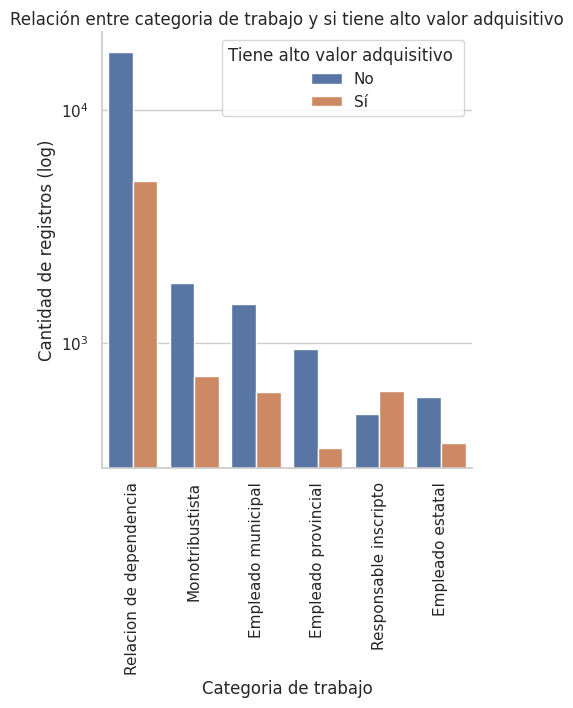

In [737]:
# Comparamos la categoria de trabajo y si tiene alto valor adquisitivo
plt.figure(dpi=150)
df_aux = df[["tiene_alto_valor_adquisitivo", "categoria_de_trabajo"]].value_counts().reset_index()
df_aux.columns.values[2] = 'count'
df_aux.tiene_alto_valor_adquisitivo.replace(to_replace=[True, False], value=["Sí", "No"], inplace=True)
df_aux.categoria_de_trabajo.replace(to_replace=["relacion_de_dependencia", "monotibutista", "empleado_municipal", "empleado_provincial", "responsable_inscripto", "empleadao_estatal"], 
    value=["Relacion de dependencia", "Monotribustista", "Empleado municipal", "Empleado provincial", "Responsable inscripto", "Empleado estatal"], inplace=True)

sbn.catplot(data=df_aux, x='categoria_de_trabajo', y='count', hue='tiene_alto_valor_adquisitivo', kind='bar', legend=False)

plt.legend(title = "Tiene alto valor adquisitivo ")
plt.ylabel("Cantidad de registros (log)")
plt.xlabel("Categoria de trabajo")
plt.title('Relación entre categoria de trabajo y si tiene alto valor adquisitivo')
plt.xticks(rotation=90)
plt.yscale("log")
plt.show()

**Conclusiones**

Podemos observar que faltan 1632 de los 32561 valores (5,6 %). 

Como entre las categorias "trabajo_voluntariado" y "sin_trabajo" hay tan solo 21 registros los eliminamos al no ser representativa la cantidad con esos tipos (0,06 %).

Podemos observar que la mayoria de los registros corresponden a valor "relacion_de_dependencia".

## **Barrio**

**Preguntas:**

* ¿La columna aporta información relevante?
* ¿El dato esta completo en todas las filas?
* ¿Los datos tienen mucha varianza?
* ¿Aporta valor para realizar una predicción?
* ¿Los datos estan balanceados?

**Análisis**

In [738]:
# ¿Tiene valores nulos?
df["barrio"].isnull().sum()

583

In [739]:
df["barrio"].value_counts()

Palermo                29150
Belgrano                 643
San Isidro               197
Villa Urquiza            137
Recoleta                 121
La Boca                  114
Agronomia                106
Almagro                  100
Balvanera                 95
Puerto Madero             90
Caballito                 81
Boedo                     80
Barracas                  75
Chacarita                 73
Coghland                  70
Floresta                  67
Constitucion              64
Colegiales                62
Flores                    60
Liniers                   59
Monte Castro              51
Mataderos                 44
Nueva Pompeya             43
Monserrat                 37
nuñez                     34
Parque Chacabuco          31
Villa Luro                29
Parque Avellaneda         29
Parque Chas               28
La Paternal               24
Retiro                    20
Villa Soldati             19
Villa Devoto              19
San Telmo                 18
Villa Real    

**Conclusiones**

Podemos observar que esta columna solo tiene un faltante de 583 sobre los 32561 valores (1,8 %). La mayoria de los registros corresponde al barrio de Palermo, los datos no estan balanceados.

## **Edad**

**Preguntas:**

* ¿La columna aporta información relevante?
* ¿El dato esta completo en todas las filas?
* ¿Los datos tienen mucha varianza?
* ¿Aporta valor para realizar una predicción?
* ¿Los datos estan balanceados?

**Análisis**

In [740]:
# ¿Tiene valores nulos?
df["edad"].isnull().sum()

0

In [741]:
df["edad"].value_counts()

36    898
31    888
34    886
23    876
35    876
     ... 
83      6
88      3
85      3
87      1
86      1
Name: edad, Length: 73, dtype: int64

**Conclusiones**

Podemos observar que no tiene valores nulos.

"Conclusion"

## **Educación alcanzada**

**Preguntas:**

* ¿La columna aporta información relevante?
* ¿El dato esta completo en todas las filas?
* ¿Los datos tienen mucha varianza?
* ¿Aporta valor para realizar una predicción?
* ¿Los datos estan balanceados?

**Análisis**

In [742]:
# ¿Tiene valores nulos?
df["educacion_alcanzada"].isnull().sum()

0

In [743]:
df["educacion_alcanzada"].value_counts()

4_anio                10491
5_anio                 7286
universidad_3_anio     5355
universidad_4_anio     1723
universidad_1_anio     1382
2_anio                 1174
universidad_2_anio     1066
1_anio                  931
7-8_grado               644
universiada_5_anio      576
9_grado                 514
3_anio                  433
universiada_6_anio      413
5-6_grado               333
1-4_grado               168
preescolar               51
Name: educacion_alcanzada, dtype: int64

In [744]:
df.replace({"preescolar" : 1, "1-4_grado": 2, "5-6_grado": 3, "7-8_grado" : 4, "9_grado" : 5, "1_anio" : 6, "2_anio" : 7, "3_anio" : 8, "4_anio" : 9, "5_anio" : 10, "universidad_1_anio" : 11, "universidad_2_anio" : 12,
              "universidad_3_anio" : 13, "universidad_4_anio" : 14, "universiada_5_anio" : 15, "universiada_6_anio" : 16}, inplace = True)

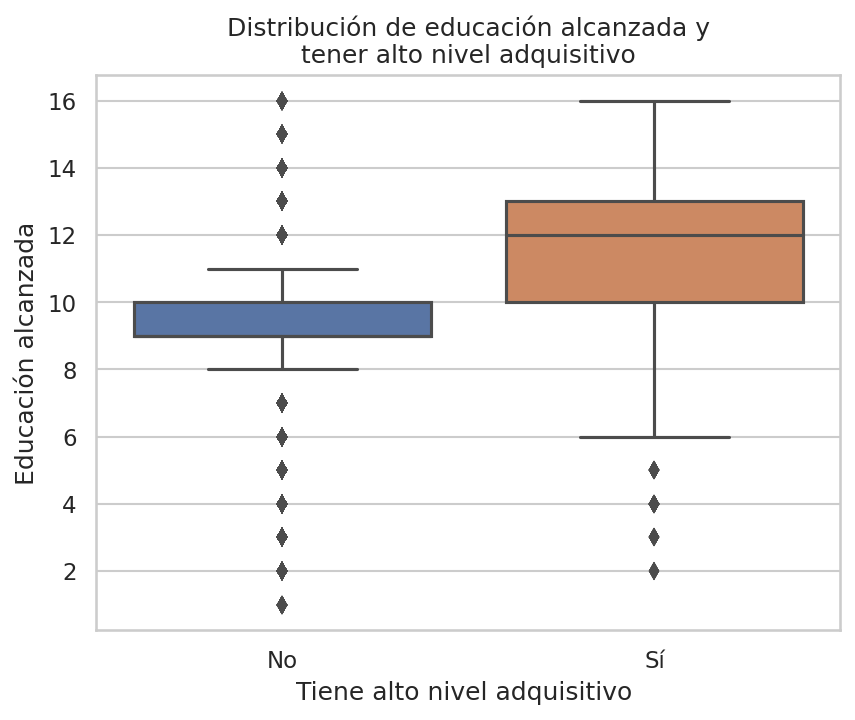

In [745]:
plt.figure(dpi=150)
plt.title("Distribución de educación alcanzada y\n tener alto nivel adquisitivo ")
sbn.boxplot(
    data=df,
    y='educacion_alcanzada',
    x='tiene_alto_valor_adquisitivo'
)
plt.ylabel("Educación alcanzada")
plt.xlabel("Tiene alto nivel adquisitivo ")
plt.xticks([False, True], ["No", "Sí"])
plt.show()

**Conclusiones**

Podemos observar que no tiene valores nulos.

Con el fin de tener una variable con cardinalidad convertimos los valores de string a números.

Vemos que si tiene un nivel de estudio de entre 5° año de secundaria y 3 de universidad tiene mas probabilidad de tener alto nivel adquisitivo.

## **Estado marital**

**Preguntas:**

* ¿La columna aporta información relevante?
* ¿El dato esta completo en todas las filas?
* ¿Los datos tienen mucha varianza?
* ¿Aporta valor para realizar una predicción?
* ¿Los datos estan balanceados?

**Análisis**

In [746]:
# ¿Tiene valores nulos?
df["estado_marital"].isnull().sum()

0

In [747]:
df["estado_marital"].value_counts()

matrimonio_civil      14967
sin_matrimonio        10674
divorciado             4442
separado               1025
viudo_a                 992
pareja_no_presente      417
matrimonio_militar       23
Name: estado_marital, dtype: int64

In [748]:
df["estado_marital"].replace(to_replace ="matrimonio_militar", value ="matrimonio", inplace=True)
df["estado_marital"].replace(to_replace ="matrimonio_civil", value ="matrimonio", inplace=True)

In [749]:
df["estado_marital"].value_counts()

matrimonio            14990
sin_matrimonio        10674
divorciado             4442
separado               1025
viudo_a                 992
pareja_no_presente      417
Name: estado_marital, dtype: int64

<Figure size 960x720 with 0 Axes>

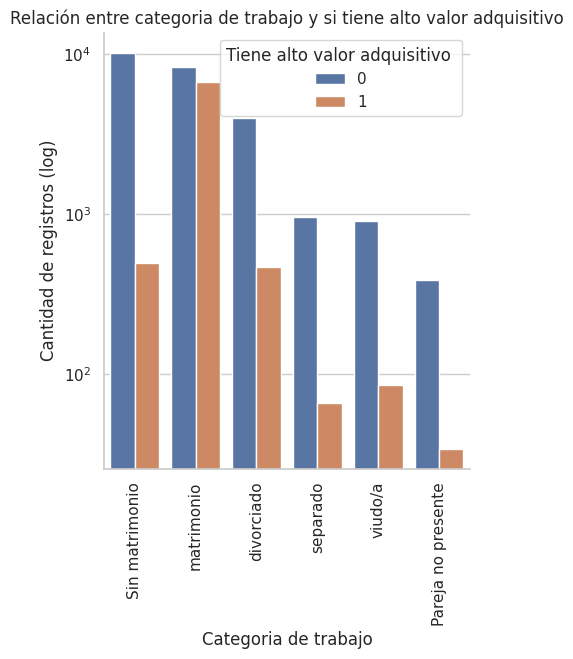

In [750]:
# Comparamos la categoria de trabajo y si tiene alto valor adquisitivo
plt.figure(dpi=150)
df_aux = df[["tiene_alto_valor_adquisitivo", "estado_marital"]].value_counts().reset_index()
df_aux.columns.values[2] = 'count'
df_aux.estado_marital.replace(to_replace=[True, False], value=["Sí", "No"], inplace=True)
df_aux.estado_marital.replace(to_replace=["sin_matrimonio", "viudo_a", "pareja_no_presente"], value=["Sin matrimonio", "viudo/a", "Pareja no presente"], inplace=True)

sbn.catplot(data=df_aux, x='estado_marital', y='count', hue='tiene_alto_valor_adquisitivo', kind='bar', legend=False)

plt.legend(title = "Tiene alto valor adquisitivo ")
plt.ylabel("Cantidad de registros (log)")
plt.xlabel("Categoria de trabajo")
plt.title('Relación entre categoria de trabajo y si tiene alto valor adquisitivo')
plt.xticks(rotation=90)
plt.yscale("log")
plt.show()

**Conclusiones**

Podemos observar que no tiene valores nulos.

Podemos observar que Pareja no presente tiene una baja probabilidad de tener alto nivel adquisitivo.

## **Ganancia, perdida declarada bolsa argentina**

**Preguntas:**

* ¿La columna aporta información relevante?
* ¿El dato esta completo en todas las filas?
* ¿Los datos tienen mucha varianza?
* ¿Aporta valor para realizar una predicción?
* ¿Los datos estan balanceados?

**Análisis**

In [751]:
# ¿Tiene valores nulos?
df["ganancia_perdida_declarada_bolsa_argentina"].isnull().sum()

0

In [752]:
df["ganancia_perdida_declarada_bolsa_argentina"].value_counts()

 0        28311
 15024      347
 7688       284
 7298       246
-1902       202
          ...  
 22040        1
 2538         1
-2467         1
-2163         1
-2080         1
Name: ganancia_perdida_declarada_bolsa_argentina, Length: 210, dtype: int64

In [753]:
df["opera_en_bolsa"] = df["ganancia_perdida_declarada_bolsa_argentina"].apply(lambda x: True if x != 0 else False)
df.drop(columns = "ganancia_perdida_declarada_bolsa_argentina", inplace = True)

In [754]:
# Analizamos opera en bolsa vs Tiene alto valor adquisitivo 
df_no_opera_bolsa_argentina = df[df["opera_en_bolsa"] == False]
df_no_opera_bolsa_argentina["tiene_alto_valor_adquisitivo"].value_counts()

0    22920
1     5391
Name: tiene_alto_valor_adquisitivo, dtype: int64

In [755]:
# Analizamos no opera en bolsa vs Tiene alto valor adquisitivo 
df_opera_bolsa_argentina = df[df["opera_en_bolsa"] == True]
df_opera_bolsa_argentina["tiene_alto_valor_adquisitivo"].value_counts()

1    2450
0    1779
Name: tiene_alto_valor_adquisitivo, dtype: int64

<Figure size 960x720 with 0 Axes>

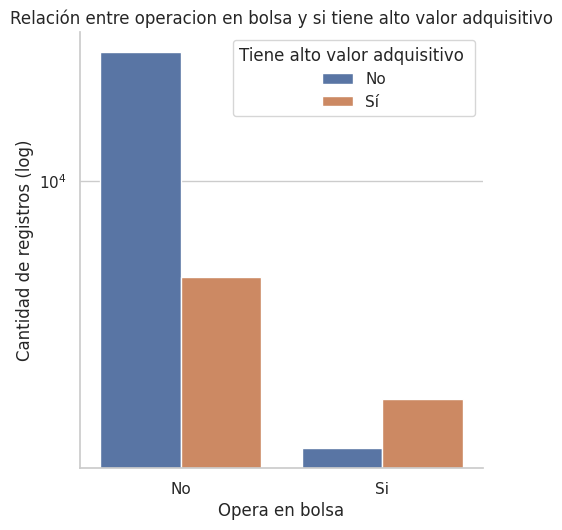

In [756]:
# Comparamos el genero y si tiene alto valor adquisitivo
plt.figure(dpi=150)
df_aux = df[["tiene_alto_valor_adquisitivo", "opera_en_bolsa"]].value_counts().reset_index()
df_aux.columns.values[2] = 'count'
df_aux.tiene_alto_valor_adquisitivo.replace(to_replace=[True, False], value=["Sí", "No"], inplace=True)
df_aux.opera_en_bolsa.replace(to_replace=[False, True], value=["No", "Si"], inplace=True)

sbn.catplot(data=df_aux, x='opera_en_bolsa', y='count', hue='tiene_alto_valor_adquisitivo', kind='bar', legend=False)

plt.legend(title = "Tiene alto valor adquisitivo ")
plt.ylabel("Cantidad de registros (log)")
plt.xlabel("Opera en bolsa")
plt.title('Relación entre operacion en bolsa y si tiene alto valor adquisitivo')
plt.yscale("log")
plt.show()

**Conclusiones**

Podemos observar que no tiene valores nulos.

Creamos una variable booleana para determinar que operan o no en bolsa, podemos observar que los que si operan tienen alto nivel adquisitivo.

## **Genero**

**Preguntas:**

* ¿La columna aporta información relevante?
* ¿El dato esta completo en todas las filas?
* ¿Los datos tienen mucha varianza?
* ¿Aporta valor para realizar una predicción?
* ¿Los datos estan balanceados?

**Análisis**

In [757]:
# ¿Tiene valores nulos?
df["genero"].isnull().sum()

0

In [758]:
df["genero"].value_counts()

hombre    21776
mujer     10764
Name: genero, dtype: int64

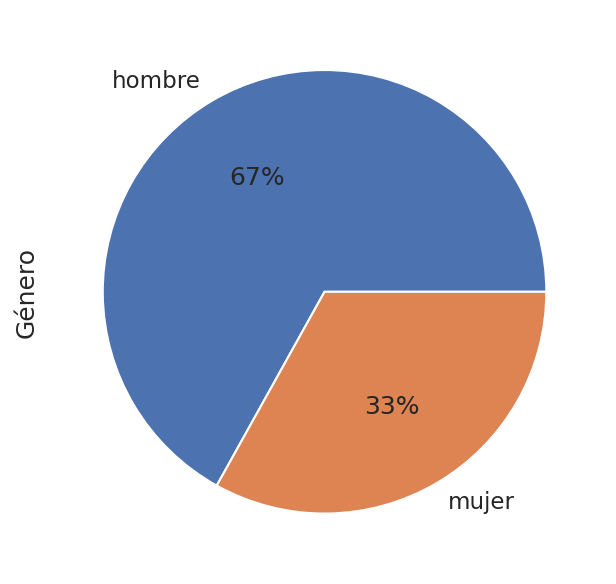

In [759]:
# Vemos en porcentaje el género 
plt.figure(dpi=150)
df.genero.value_counts().plot(kind='pie', autopct='%1.0f%%', ylabel='Género')

In [760]:
# Analizamos hombre vs Tiene alto valor adquisitivo 
df_genero_hombre = df[df["genero"] == "hombre"]
df_genero_hombre["tiene_alto_valor_adquisitivo"].value_counts()

0    15114
1     6662
Name: tiene_alto_valor_adquisitivo, dtype: int64

In [761]:
# Analizamos mujer vs Tiene alto valor adquisitivo 
df_genero_mujer = df[df["genero"] == "mujer"]
df_genero_mujer["tiene_alto_valor_adquisitivo"].value_counts()

0    9585
1    1179
Name: tiene_alto_valor_adquisitivo, dtype: int64

<Figure size 960x720 with 0 Axes>

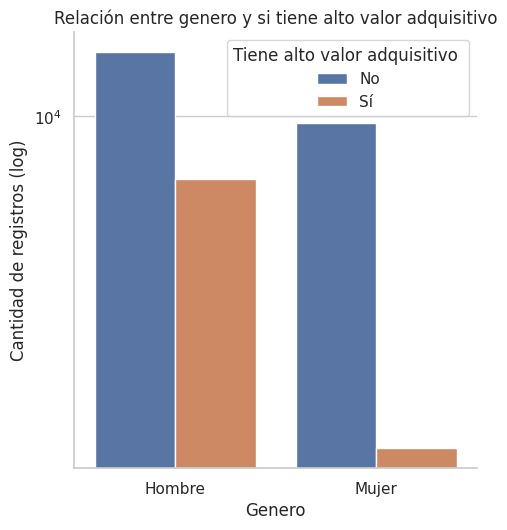

In [762]:
# Comparamos el genero y si tiene alto valor adquisitivo
plt.figure(dpi=150)
df_aux = df[["tiene_alto_valor_adquisitivo", "genero"]].value_counts().reset_index()
df_aux.columns.values[2] = 'count'
df_aux.tiene_alto_valor_adquisitivo.replace(to_replace=[True, False], value=["Sí", "No"], inplace=True)
df_aux.genero.replace(to_replace=["hombre", "mujer"], value=["Hombre", "Mujer"], inplace=True)

sbn.catplot(data=df_aux, x='genero', y='count', hue='tiene_alto_valor_adquisitivo', kind='bar', legend=False)

plt.legend(title = "Tiene alto valor adquisitivo ")
plt.ylabel("Cantidad de registros (log)")
plt.xlabel("Genero")
plt.title('Relación entre genero y si tiene alto valor adquisitivo')
plt.yscale("log")
plt.show()

**Conclusiones**

Podemos observar que no tiene valores nulos y solo dos valores posibles. La mayoria de los datos corresponde el valor hombre.

"Conclusion"

## **Horas de trabajo registradas**

**Preguntas:**

* ¿La columna aporta información relevante?
* ¿El dato esta completo en todas las filas?
* ¿Los datos tienen mucha varianza?
* ¿Aporta valor para realizar una predicción?
* ¿Los datos estan balanceados?

**Análisis**

In [763]:
# ¿Tiene valores nulos?
df["horas_trabajo_registradas"].isnull().sum()

0

In [764]:
df["horas_trabajo_registradas"].value_counts()

40    15212
50     2817
45     1824
60     1475
35     1296
      ...  
92        1
94        1
87        1
74        1
82        1
Name: horas_trabajo_registradas, Length: 94, dtype: int64

**Conclusiones**

Podemos observar que no tiene valores nulos. (Hay unos valores mas representativos)

"Conclusion"

## **Religion**

**Preguntas:**

* ¿La columna aporta información relevante?
* ¿El dato esta completo en todas las filas?
* ¿Los datos tienen mucha varianza?
* ¿Aporta valor para realizar una predicción?
* ¿Los datos estan balanceados?

**Análisis**

In [765]:
# ¿Tiene valores nulos?
df["religion"].isnull().sum()

0

In [766]:
df["religion"].value_counts()

cristianismo    27799
judaismo         3121
budismo          1038
ateismo           311
otro              271
Name: religion, dtype: int64

In [767]:
# Analizamos cristianismo vs Tiene alto valor adquisitivo 
df_cristianismo = df[df["religion"] == "cristianismo"]
df_cristianismo["tiene_alto_valor_adquisitivo"].value_counts()

0    20682
1     7117
Name: tiene_alto_valor_adquisitivo, dtype: int64

In [768]:
# Analizamos judaismo vs Tiene alto valor adquisitivo 
df_judaismo = df[df["religion"] == "judaismo"]
df_judaismo["tiene_alto_valor_adquisitivo"].value_counts()

0    2734
1     387
Name: tiene_alto_valor_adquisitivo, dtype: int64

In [769]:
# Analizamos budismo vs Tiene alto valor adquisitivo 
df_budismo = df[df["religion"] == "budismo"]
df_budismo["tiene_alto_valor_adquisitivo"].value_counts()

0    762
1    276
Name: tiene_alto_valor_adquisitivo, dtype: int64

In [770]:
# Analizamos ateismo vs Tiene alto valor adquisitivo 
df_ateismo = df[df["religion"] == "ateismo"]
df_ateismo["tiene_alto_valor_adquisitivo"].value_counts()

0    275
1     36
Name: tiene_alto_valor_adquisitivo, dtype: int64

In [771]:
# Analizamos otro vs Tiene alto valor adquisitivo 
df_otro = df[df["religion"] == "otro"]
df_otro["tiene_alto_valor_adquisitivo"].value_counts()

0    246
1     25
Name: tiene_alto_valor_adquisitivo, dtype: int64

<Figure size 960x720 with 0 Axes>

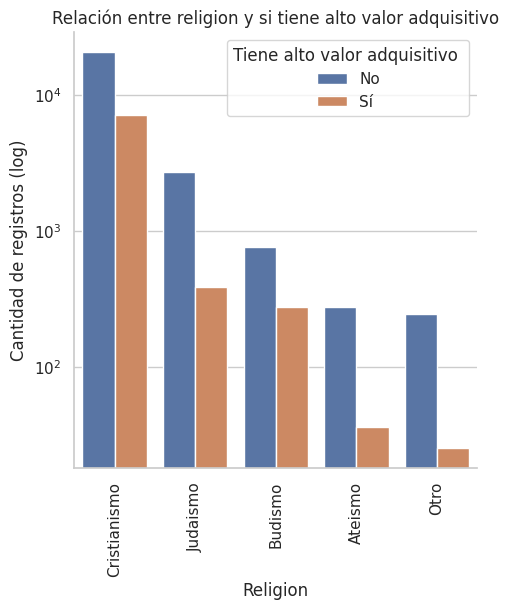

In [772]:
# Comparamos religion y si tiene alto valor adquisitivo
plt.figure(dpi=150)
df_aux = df[["tiene_alto_valor_adquisitivo", "religion"]].value_counts().reset_index()
df_aux.columns.values[2] = 'count'
df_aux.tiene_alto_valor_adquisitivo.replace(to_replace=[True, False], value=["Sí", "No"], inplace=True)
df_aux.religion.replace(to_replace=["cristianismo", "judaismo", "budismo", "ateismo", "otro"], value=["Cristianismo", "Judaismo", "Budismo", "Ateismo", "Otro"], inplace=True)

sbn.catplot(data=df_aux, x='religion', y='count', hue='tiene_alto_valor_adquisitivo', kind='bar', legend=False)

plt.legend(title = "Tiene alto valor adquisitivo ")
plt.ylabel("Cantidad de registros (log)")
plt.xlabel("Religion")
plt.title('Relación entre religion y si tiene alto valor adquisitivo')
plt.xticks(rotation=90)
plt.yscale("log")
plt.show()

**Conclusiones**

Podemos observar que no tiene valores nulos. La mayoria de los valores corresponde a Cristianismo.

"Conclusion"

## **Rol familiar registrado**

**Preguntas:**

* ¿La columna aporta información relevante?
* ¿El dato esta completo en todas las filas?
* ¿Los datos tienen mucha varianza?
* ¿Aporta valor para realizar una predicción?
* ¿Los datos estan balanceados?

**Análisis**

In [773]:
# ¿Tiene valores nulos?
df["rol_familiar_registrado"].isnull().sum()

0

In [774]:
df["rol_familiar_registrado"].value_counts()

casado         13189
sin_familia     8304
con_hijos       5058
soltero_a       3444
casada          1564
otro             981
Name: rol_familiar_registrado, dtype: int64

In [775]:
df["rol_familiar_registrado"].replace(to_replace ="casada", value ="casado", inplace=True)

<Figure size 960x720 with 0 Axes>

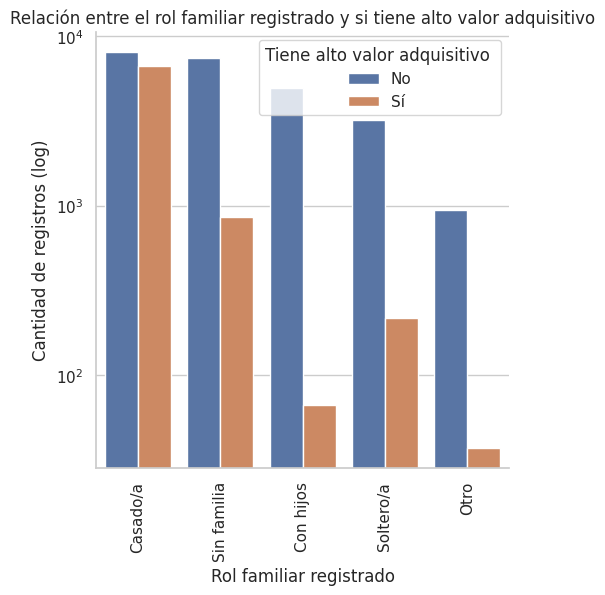

In [776]:
# Comparamos la categoria de trabajo y si tiene alto valor adquisitivo
plt.figure(dpi=150)
df_aux = df[["tiene_alto_valor_adquisitivo", "rol_familiar_registrado"]].value_counts().reset_index()
df_aux.columns.values[2] = 'count'
df_aux.tiene_alto_valor_adquisitivo.replace(to_replace=[True, False], value=["Sí", "No"], inplace=True)
df_aux.rol_familiar_registrado.replace(to_replace=["casado", "sin_familia", "con_hijos", "soltero_a", "otro"],  value=["Casado/a", "Sin familia", "Con hijos", "Soltero/a", "Otro"], inplace=True)

sbn.catplot(data=df_aux, x='rol_familiar_registrado', y='count', hue='tiene_alto_valor_adquisitivo', kind='bar', legend=False)

plt.legend(title = "Tiene alto valor adquisitivo ")
plt.ylabel("Cantidad de registros (log)")
plt.xlabel("Rol familiar registrado")
plt.title('Relación entre el rol familiar registrado y si tiene alto valor adquisitivo')
plt.xticks(rotation=90)
plt.yscale("log")
plt.show()

**Conclusiones**

Podemos observar que no tiene valores nulos. 

Unificamos los valores de casado y casada.



## **Trabajo**

**Preguntas:**

* ¿La columna aporta información relevante?
* ¿El dato esta completo en todas las filas?
* ¿Los datos tienen mucha varianza?
* ¿Aporta valor para realizar una predicción?
* ¿Los datos estan balanceados?

**Análisis**

In [777]:
# ¿Tiene valores nulos?
df["trabajo"].isnull().sum()

1836

In [778]:
df["trabajo"].value_counts()

profesional_especializado    4140
reparador                    4098
directivo_gerente            4066
entretenimiento              3767
ventas                       3650
otros                        3294
inspector                    2001
transporte                   1596
limpiador                    1369
sector_primario               988
soporte_tecnico               928
seguridad                     649
servicio_domestico            149
ejercito                        9
Name: trabajo, dtype: int64

**Conclusiones**

Podemos observar que esta columna tiene un faltante de 1843 del total de valores (5,7 %). (Hay unos valores pocos representativos)

"Conclusion"

# **Relación entre columnas**

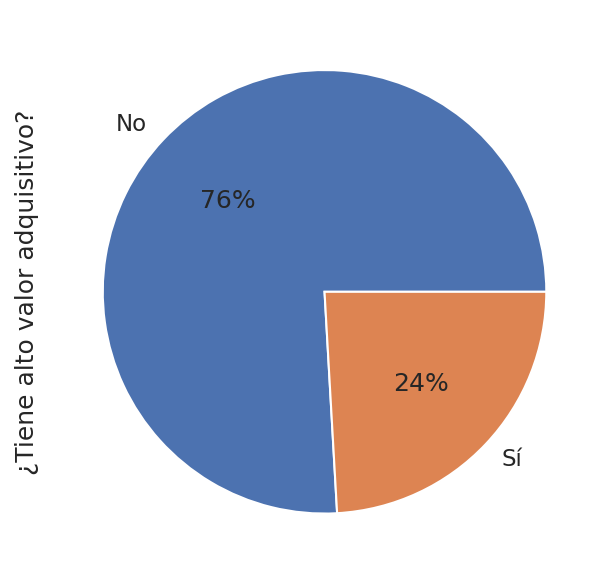

In [779]:
# Vemos en porcentaje cantidad de nivel adquisitivo alto 
plt.figure(dpi=150)
df.tiene_alto_valor_adquisitivo.replace(to_replace=[True, False], value=["Sí", "No"]).value_counts().plot(kind='pie', autopct='%1.0f%%', ylabel='¿Tiene alto valor adquisitivo?')


# **Conclusión final**

# **Feature Engineering**

In [780]:
def FeatureEngineering(df):
    
    df_clean = df.copy()

    df_clean["educacion_alcanzada"].replace({"preescolar" : 1, "1-4_grado": 2, "5-6_grado": 3, "7-8_grado" : 4, "9_grado" : 5, "1_anio" : 6, "2_anio" : 7, "3_anio" : 8, "4_anio" : 9, "5_anio" : 10, "universidad_1_anio" : 11, 
                      "universidad_2_anio" : 12, "universidad_3_anio" : 13, "universidad_4_anio" : 14, "universiada_5_anio" : 15, "universiada_6_anio" : 16}, inplace = True)
    
    df_clean["opera_en_bolsa"] = df_clean["ganancia_perdida_declarada_bolsa_argentina"].apply(lambda x: True if x != 0 else False)
    df_clean.drop(columns = "ganancia_perdida_declarada_bolsa_argentina", inplace = True)
            
    return df_clean

In [781]:
def Predict(df):
  pred = []
  values = df.values

  for val in values:
    if ((val[12] == True) or (val[2] == "responsable_inscripto")):
      pred.append(1)
    else:
      pred.append(0)

  return pred


# Tiene alto valor adquisitivo 
# responsable inscripto
# Opera en bolsa
# 14 y 17 años de estudio
# 10 y 13 nivel de educacion
# Casado

# NO
# genero == mujer
# barrio == Palermo 

In [782]:
def baseline(df):
    entrada = FeatureEngineering(df)
    pred = Predict(entrada)
    
    return pred

In [783]:
# Generamos dataframe para probar
df_datos_test = GetData()
df_datos_valor_adquisitivo = df_datos_test["tiene_alto_valor_adquisitivo"]

predicciones = baseline(df_datos_test)
accuracy_score(df_datos_valor_adquisitivo, predicciones)

0.7772795675808483